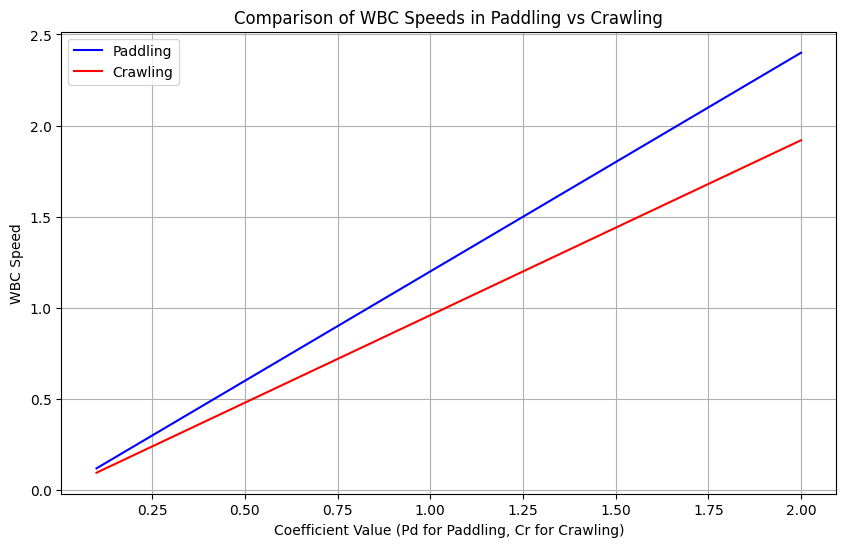

In [6]:
#RayDynamics Model, Partha Pratim Ray, https://scholar.google.com/citations?user=ioplfagAAAAJ&hl=en&oi=ao, August, 2023

#This code displays a plot showing how the WBC speed changes under different scenarios (by varying Pd and Cr). 

#It helps us to compare which mechanism results in faster speeds under different conditions.

#We'll vary the parameters Pd and Cr (coefficients for paddling and crawling) over a range to simulate various scenarios.

#The other influencing factors, such as s_w and S_surface (surface adhesion strength), will be kept constant for this simple comparison.

#We'll plot the resulting speeds for both mechanisms over the range of varying parameters.

import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
s_w_val = 1.2  # Assumed constant WBC speed factor for simplicity
Ssurface_val = 0.8  # Assumed constant surface adhesion strength

# Varying coefficients for paddling and crawling
Pd_values = np.linspace(0.1, 2, 100)  # Varying from 0.1 to 2 for illustration
Cr_values = np.linspace(0.1, 2, 100)  # Varying from 0.1 to 2 for illustration

# Compute speeds for both mechanisms
speeds_paddle = [model.vw_paddle(Pd, s_w_val) for Pd in Pd_values]
speeds_crawl = [model.vw_crawl(Cr, s_w_val, Ssurface_val) for Cr in Cr_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Pd_values, speeds_paddle, label="Paddling", color="blue")
plt.plot(Cr_values, speeds_crawl, label="Crawling", color="red")
plt.xlabel("Coefficient Value (Pd for Paddling, Cr for Crawling)")
plt.ylabel("WBC Speed")
plt.title("Comparison of WBC Speeds in Paddling vs Crawling")
plt.legend()
plt.grid(True)
plt.show()

#Note: The exact range and values of Pd and Cr should be set according to realistic scenarios or as per your specific research needs.

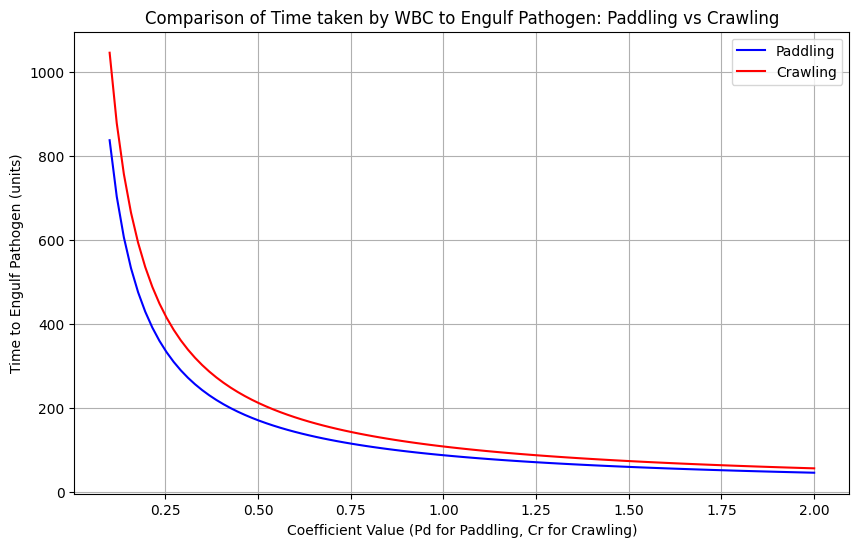

In [7]:
#To determine the time taken by the WBC to engulf a pathogen, we need to define some additional factors:

#Distance to the Pathogen: The distance that a WBC needs to travel to reach and engulf a pathogen. For this illustration, let's consider a constant distance, d = 100 units (you can change it as per your requirement).

#Engulfment Speed: How quickly the WBC engulfs the pathogen once it reaches it. This might differ slightly based on whether the WBC is crawling or paddling, but for the sake of simplicity, let's consider a constant value.

#Given that speed is distance over time (speed = distance/time), the time taken to reach the pathogen is time = distance/speed.


import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
s_w_val = 1.2  # Assumed constant WBC speed factor for simplicity
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached

# Varying coefficients for paddling and crawling
Pd_values = np.linspace(0.1, 2, 100)  # Varying from 0.1 to 2 for illustration
Cr_values = np.linspace(0.1, 2, 100)  # Varying from 0.1 to 2 for illustration

# Compute times for both mechanisms
times_paddle = [distance_to_pathogen / model.vw_paddle(Pd, s_w_val) + engulfment_time for Pd in Pd_values]
times_crawl = [distance_to_pathogen / model.vw_crawl(Cr, s_w_val, Ssurface_val) + engulfment_time for Cr in Cr_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Pd_values, times_paddle, label="Paddling", color="blue")
plt.plot(Cr_values, times_crawl, label="Crawling", color="red")
plt.xlabel("Coefficient Value (Pd for Paddling, Cr for Crawling)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Comparison of Time taken by WBC to Engulf Pathogen: Paddling vs Crawling")
plt.legend()
plt.grid(True)
plt.show()


#With this plot, you'll be able to see which mechanism (paddling or crawling) allows the WBC to reach and engulf the pathogen more quickly, 
#based on varying coefficients.


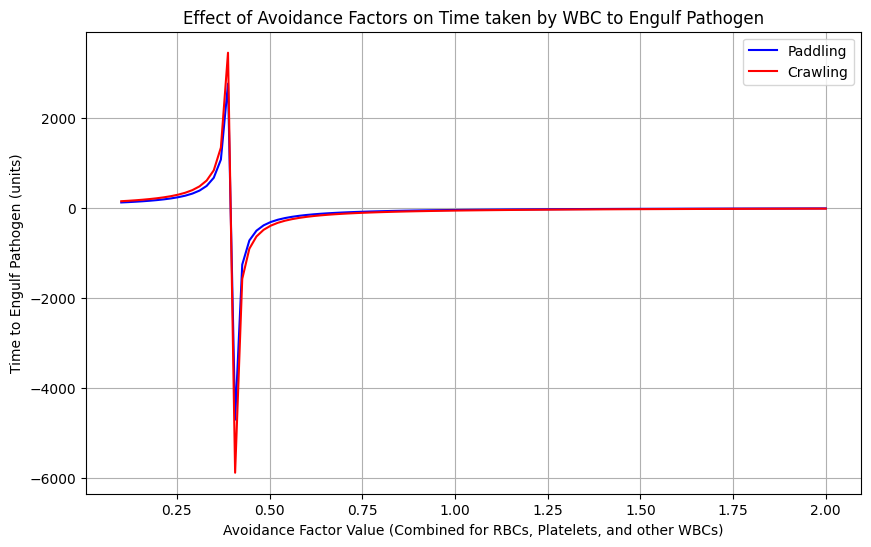

In [8]:
#To assess how different avoidance factors affect the time taken by the WBC to consume a pathogen, we'll vary these avoidance factors:

#A_RBC: Avoidance factor for RBCs
#A_Pl: Avoidance factor for platelets
#A_WBC: Avoidance factor for other WBCs
#When the avoidance factor increases, we expect the speed of the WBC to decrease, as it has to make more adjustments to avoid obstacles.

#For simplification:

#Let the WBC speed decrease linearly with an increase in the avoidance factor.
#The range for the avoidance factors will be set between 0.1 to 2.0 (you can adjust this if you have specific values in mind).
#We'll plot the time taken by the WBC to consume the pathogen under various avoidance factors for both paddling and crawling mechanisms.


import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
s_w_val = 1.2  # Assumed constant WBC speed factor for simplicity
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached

Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

# Varying avoidance factors
avoidance_values = np.linspace(0.1, 2.0, 100) 

# Compute times for both mechanisms under varying avoidance factors
times_paddle = [distance_to_pathogen / (model.vw_paddle(Pd, s_w_val - A_RBC - A_Pl - A_WBC)) + engulfment_time for A_RBC, A_Pl, A_WBC in zip(avoidance_values, avoidance_values, avoidance_values)]
times_crawl = [distance_to_pathogen / (model.vw_crawl(Cr, s_w_val - A_RBC - A_Pl - A_WBC, Ssurface_val)) + engulfment_time for A_RBC, A_Pl, A_WBC in zip(avoidance_values, avoidance_values, avoidance_values)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avoidance_values, times_paddle, label="Paddling", color="blue")
plt.plot(avoidance_values, times_crawl, label="Crawling", color="red")
plt.xlabel("Avoidance Factor Value (Combined for RBCs, Platelets, and other WBCs)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Avoidance Factors on Time taken by WBC to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()


#In this illustration, the total avoidance factor is the combined effect of avoidance due to RBCs, platelets, and other WBCs. 
#You can separately evaluate the effect of each factor if desired. 
#The plot will show how the time to consume the pathogen changes as the total avoidance factor changes.

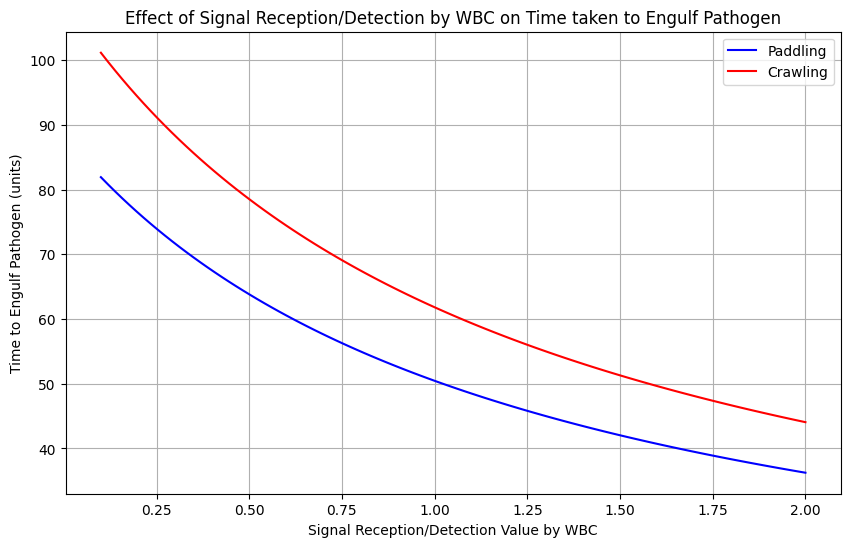

In [9]:
#To demonstrate the effects of varying the signal reception/detection (R_d) by the WBC on the time taken to consume the pathogen, we'll:

#Vary R_d values.
#For each R_d value, compute the speed of the WBC under both paddling and crawling mechanisms.
#Calculate the time taken to reach the pathogen based on the adjusted speed.
#Add the constant time taken to engulf the pathogen.
#Plot the times against the varying R_d values for both mechanisms.



import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
s_w_val = 1.2  # Assumed constant WBC speed factor for simplicity
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached

Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

# Varying signal reception/detection by WBC
Rd_values = np.linspace(0.1, 2.0, 100)  # Assume Rd values vary from 0.1 to 2.0

# Compute times for both mechanisms under varying Rd values
times_paddle = [distance_to_pathogen / (model.vw_paddle(Pd, s_w_val + Rd)) + engulfment_time for Rd in Rd_values]
times_crawl = [distance_to_pathogen / (model.vw_crawl(Cr, s_w_val + Rd, Ssurface_val)) + engulfment_time for Rd in Rd_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Rd_values, times_paddle, label="Paddling", color="blue")
plt.plot(Rd_values, times_crawl, label="Crawling", color="red")
plt.xlabel("Signal Reception/Detection Value by WBC")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Signal Reception/Detection by WBC on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()


#In this plot, as the signal reception/detection (R_d) increases, we anticipate that the WBC might reach the pathogen quicker. 
#This is under the assumption that an enhanced R_d value augments the WBC speed, making it more efficient in moving towards the pathogen. 
#Adjust this assumption if necessary based on domain-specific knowledge.

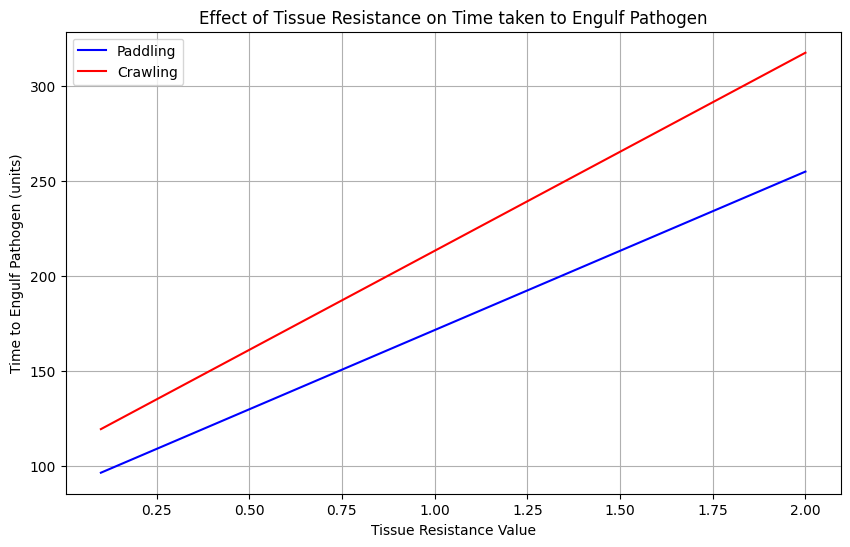

In [10]:
#The tissue resistance (T) could influence the speed of the WBC, especially when the WBC is trying to move through extravascular spaces. A higher tissue resistance might slow down the WBC.

#Let's vary the tissue resistance and examine its effect on the time taken by the WBC to consume the pathogen under both paddling and crawling mechanisms:

#Vary T values.
#For each T value, compute the speed of the WBC under both paddling and crawling mechanisms.
#Calculate the time taken to reach the pathogen based on the adjusted speed.
#Add the constant time taken to engulf the pathogen.
#Plot the times against the varying T values for both mechanisms.


import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
s_w_val = 1.2  # Assumed constant WBC speed factor for simplicity
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached

Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

# Varying tissue resistance values
T_values = np.linspace(0.1, 2.0, 100)  # Assume T values vary from 0.1 to 2.0

# Compute times for both mechanisms under varying T values
times_paddle = [(distance_to_pathogen / model.vw_paddle(Pd, s_w_val * (1 / (1 + T)))) + engulfment_time for T in T_values]
times_crawl = [(distance_to_pathogen / model.vw_crawl(Cr, s_w_val * (1 / (1 + T)), Ssurface_val)) + engulfment_time for T in T_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(T_values, times_paddle, label="Paddling", color="blue")
plt.plot(T_values, times_crawl, label="Crawling", color="red")
plt.xlabel("Tissue Resistance Value")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Tissue Resistance on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()

#In the above code, the impact of tissue resistance on the WBC's movement is modeled as inversely proportional. 
#As the tissue resistance increases, the effective speed of the WBC decreases, resulting in longer times to reach and engulf the pathogen. 
#Adjust this modeling if necessary based on more refined domain-specific insights.